In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,Dense,Dropout,BatchNormalization,Flatten,MaxPooling2D,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [8]:
def load_data(folder_path):
    images=[]
    labels=[]
    for label, category in enumerate(['CANCER','NON CANCER']):
        category_folder=os.path.join(folder_path,category)
        for file_name in os.listdir(category_folder):
            image_path=os.path.join(category_folder,file_name)
            image=load_img(image_path,target_size=(128,128))
            image_array=img_to_array(image)
            images.append(image_array)
            labels.append(label)
    return np.array(images),np.array(labels)

In [11]:
import os
import tensorflow as tf

folder_path=r"C:\Users\Student\Downloads\archive\Oral Cancer\Oral Cancer Dataset"
images,labels=load_data(folder_path)

X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42,shuffle=True)

model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(128,128,3),activation="relu",kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu",kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu",kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu",kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss="binary_crossentropy",metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],optimizer='adam')#add more

early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)#add more
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=0.00001)
checkpoint_filepath=r'C:\Users\Student\NNM22AM010\best_model_ORAL_CANCER.keras'
checkpoint=ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history=model.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    validation_data=(X_test,y_test),
    callbacks=[early_stopping,reduce_lr,checkpoint]
)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5823 - loss: 9.3310 - precision_1: 0.4188 - recall: 0.5560
Epoch 1: val_accuracy improved from -inf to 0.71333, saving model to C:\Users\Student\NNM22AM010\best_model_ORAL_CANCER.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5841 - loss: 9.2953 - precision_1: 0.4206 - recall: 0.5548 - val_accuracy: 0.7133 - val_loss: 86.7245 - val_precision_1: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7202 - loss: 6.4276 - precision_1: 0.5911 - recall: 0.6249
Epoch 2: val_accuracy did not improve from 0.71333
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7197 - loss: 6.3997 - precision_1: 0.5904 - recall: 0.6236 - val_accuracy: 0.6667 - val_loss: 6.6294 - val_precision_1: 0.4386 - val_recall: 0.5814 - learning_rate: 0.0010
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7969 - loss: 4.7673 - precision_1: 0.6961 - recall: 0.692

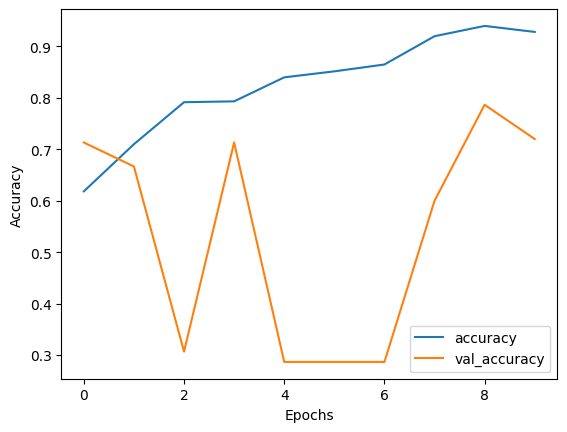

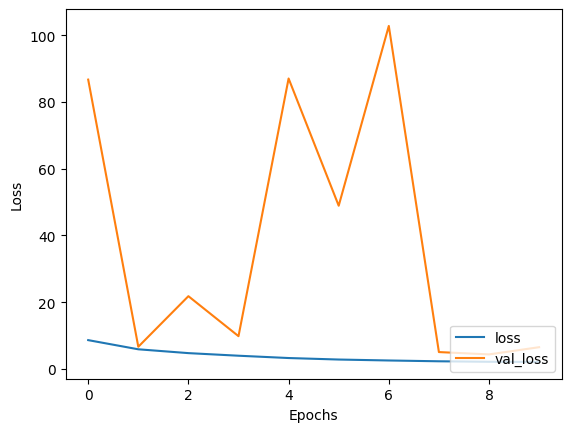

In [14]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [15]:
score=model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step - accuracy: 0.7922 - loss: 4.1592 - precision_1: 0.7498 - recall: 0.2938


In [16]:
print("Accuary : ",score[1])

Accuary :  0.7866666913032532
